In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from IPython.display import display, clear_output

import plotly.express as px #import for 3d interactive plotting
import ProjectFunctions as pf

## Main Class

In [16]:
class system():
    
    def __init__(self, name, mass, diameter, pos=[0,0,0], gravity=0): #diameter in kilometers. 
        
        '''
        Initializes the class.
        
        Takes inputs for the central body of the system.
            Central body at pos (0,0,0)
        
        Creates Array and DataFrame of Info.
            
        '''
        
        #initializing the body dataframe
        self.bodies = pd.DataFrame(columns=['Initial Position (m)','Mass (kg)','Initial Velocity (m/s)', 'Diameter (m)', 
                                            'Gravity (m/s^2)', 'Position Index']) 
        
        #numpy array of shape dimension 3, number of objects
        self.positions = np.array([pos]).T
        self.velocities = np.array([pos]).T
        self.masses = np.array(mass)
        self.names = np.array(name)
        
        self.central_pos = pos #setting the position of the central body
        self.central_name = name #setting the name of the central body
        self.central_mass = mass #setting the mass of the central body
        
        #adding the parameters of the central body to the dataframe
        self.bodies.loc[name] = {'Initial Position (m)': pos, 'Mass (kg)': mass, 'Initial Velocity (m/s)': [0,0,0], 
                                 'Diameter (m)': diameter, 'Position Index': 0} 
    
    
    def add_body(self, name, mass, pos, velocity, diameter, gravity=0):
        
        '''
        Adds an individual body into the system.
        '''
        
        #find the index of the new row
        index = len(self.bodies) 
        
        #create dict of data for new row
        new_row = {'Initial Position (m)': pos, 'Mass (kg)': mass, 'Initial Velocity (m/s)': velocity, 'Diameter (m)': diameter, 
                   'Gravity (m/s^2)': gravity, 'Position Index': index}
        
        #create array of positions of shape dimension 3 by 1
        pos = np.array([pos]).T 
        vel = np.array([velocity]).T
        
        #insert new row in dataframe
        self.bodies.loc[name] = new_row 
        
        #append individual position,velocity,and mass information to the respective full array
        self.positions = np.append(self.positions, pos, axis=1) 
        self.velocities = np.append(self.velocities, vel, axis=1)
        self.masses = np.append(self.masses, mass)
        self.names = np.append(self.names, name)
        
    def return_positions(self):
        
        '''
        Return fuction for positions
        '''
    
        return self.positions
    
    def return_bodies(self):
        
        '''
        Return fuction for the bodies DataFrame.
        '''
        
        return self.bodies
    
    def update_kinematics(self):
        
        pass
    
    def delete_body(self, body):
        
        '''
        Removes a single body from the system
        
        The body is called by its name (type: string)
        '''
        
        #pulls body's position index in the array from dataframe
        index = self.bodies.loc[body,'Position Index'] 
        
        #removes the body from the vectorized data arrays
        self.positions = np.delete(self.positions, index, 1) 
        self.velocities = np.delete(self.velocities, index, 1)
        self.masses = np.delete(self.masses, index)
        self.names = np.delete(self.names, index)
        
        #removes the body from the dataframe
        self.bodies = self.bodies.drop(body) 
        
        #resets the index position column in the DF to be in line with positions array.
        for row in range(len(self.bodies)):
            if self.bodies.iloc[row, 5] > index: 
                self.bodies.iloc[row, 5] -= 1
                
    
    def interactive(self, dimension):
        
        '''
        This method provides two different interactive looks at the positions at the most recent update.
        '''
        
        #insert update_update kinematics function
        
        #calling and saving the diameter of each body to use later.
        diameter = self.bodies['Diameter (m)'].to_list()
        
        #sets a color map so each body has a different color based on their initial velocity
        c = np.arange(0,len(self.bodies))
        
        
        '''
        This will return the three dimensional interactive graph.
        
        The if statments use the argument entered into the method.
        '''
        
        #If three dimensions are requested
        if dimension == 3:

            #initializing x and y values
            x = self.positions[0] #made a list to make proper length
            y = self.positions[1]
            z = self.positions[2]

            #create the 3d plot
            scatter3d = px.scatter_3d(x=x, y=y, z=z, color=c, text=self.bodies.index.to_list(), template='plotly_dark', 
                                      hover_name=self.bodies.index.to_list(), size = diameter, title = 'Current Positions and Data')
            
            #update the background, and aesthetics for a cleaner image.
            scatter3d.update_scenes(xaxis_showgrid=False,yaxis_showgrid=False, zaxis_showgrid=False, xaxis_showticklabels=False, 
                                    yaxis_showticklabels=False, zaxis_showticklabels=False, camera_projection_type='orthographic',
                                    xaxis_zeroline=False, yaxis_zeroline=False, zaxis_zeroline=False)
            
            #removes the colorbar from the image
            scatter3d.update_coloraxes(showscale=False)
            
            #returns the 3d scatter plot
            return scatter3d.show()
        
        
        '''
        This will return the one dimensional interactive graph.
        
        It returns two graphs of the magnitude of the distance of each body from the central body.
         - Graph 1: The real scale of distance.
         - Graph 2: The logarithmic scale of distance.
        
        The if statments use the argument entered into the method.
        '''
        
        # if one dimension is requested
        if dimension == 1:
            
            mag = []
            
            #Looping over the planets in the system by index of the planet
            for i in range(0,len(self.bodies)):
                planet_mag = np.linalg.norm(self.positions[:,i]) # np.linalg.norm takes in an multidimensional array and returns the magnitude of that vector.
                mag.append(planet_mag) # adds the magnitudes to a new list.
        
            # graphing the magnitudes on a 1d plane being labeled the same way as the 3d interactive graph. Y axis is simply zeros.
            fig = px.scatter(x=mag, y=np.zeros(11),hover_name=self.bodies.index.to_list(), color=c, 
                             size=diameter, template='plotly_dark', title = 'Magnitude of Distance Normal') 

            # same as before but we want our x axis to be logarithmic so some bodies are easier to view.
            logfig = px.scatter(x=mag, y=np.zeros(11),hover_name=self.bodies.index.to_list(),log_x=True, 
                                color=c, size=diameter, template='plotly_dark', title = 'Magnitude of Distance Logarithmic')
            
            # returns both figures
            return fig.show(), logfig.show()
        
        # if an integer other than 1 or 3 is inputed, it will return this error message.
        else:
            
            print('Uh Oh! That dimension is not correct! Please input 1 or 3.') # will print the two argument options.
            
    def calculate_residuals(self, correct_pos):
        
            '''
            This method would only be used when using actual planets/bodies.
            
            correct_pos: the correct positions of the planets based on actual data.
            
            returns an array of residuals that are the difference
            between the correct plantery positions and the predicted ones.
            '''
            for i in range(len(sim.positions)):
                val = np.linalg.norm(self.sim_positions[i])
            residuals = correct_pos - val
            return residuals
            
    
    def idealStepTimeValues(self, numYears):
        iterTime = 365*numYears
        h = 84000/numYears
        t = np.arange(0,iterTime,1)
        
        print('To model', numYears, 'years with a step-size (h) value of 1, set h and time parameters to the following.')
        print('h:',h)
        print('time:',iterTime)
    
    def generate_SimulationData(self, h, time=1, method=0):
        '''
        n_iteration: number of iterations in the simulation
        time: number of years to run the simulation for
        method: method for generating data
                0: Euler's Method
                1: Huen's Method
                etc...
                
        return a vectorized array of positions, velocities, and accelerations for each body over 
               the course of the simulation using the chosen method
        '''
        
        if method == 0:
            self.sim_positions, self.sim_velocities, self.sim_accelerations = pf.kinematic_Euler(h,time,self.positions,self.velocities,self.masses)
            
            #updating the positions and velocities arrays to the most recent of each
            self.positions = self.sim_positions[len(self.sim_positions)]
            self.velocities = self.sim_velocities[len(self.sim_positions)]
            
        elif method == 1:
            self.sim_positions, self.sim_velocities, self.sim_accelerations = pf.kinematic_Huens(h,time,self.positions,self.velocities,self.masses)
            
            #updating the positions and velocities arrays to the most recent of each
            self.positions = self.sim_positions[len(self.sim_positions)]
            self.velocities = self.sim_velocities[len(self.sim_positions)]
        
        else:
            raise ValueError(method,' Is not a valid method identifier, please input a valid identifier')
            
    def generate_SimulationOrbitGraph(self, path, prefix, title, axesTF = True):
        '''
        generate a graph containing the plots of the objects path over the course of the simulation
        
        path: relative path to were the animation frames will be stored (end with /)
        prefix: generated image filename prefix
        n_iteration: 
        axesTF: conditional for whether to have the axes elements on or off
        '''
        
        xPlot, yPlot, zPlot = self.sim_positions[:,0], self.sim_positions[:,1], self.sim_positions[:,2]
        
        fig = plt.figure(figsize = (15,15))
        ax = fig.add_subplot(111, projection='3d')

        for i in range(len(self.names)):
            tempAx = ax.plot(xPlot[:,i], yPlot[:,i], zPlot[:,i], label = self.names[i])

        ax.view_init(elev=90, azim=0) #Change view parameters (spin along the azimuth)

        #Set axes state
        ax.axis('on')
        if axesTF == False:
            ax.axis('off')

        ax.set_xlabel('x', fontsize = 15) #Assign label
        ax.set_ylabel('y', fontsize = 15) #Assign label
        ax.set_zlabel('z', fontsize = 15) #Assign label

        systemScale = 10e13

        ax.set_xlim3d(-systemScale,systemScale)
        ax.set_ylim3d(-systemScale,systemScale)
        ax.set_zlim3d(-systemScale,systemScale)

        ax.set_title(title, y=0.95, fontsize=15)
        
        ax.legend()

        #Saving the graph
        fig.savefig(path + prefix + '.jpeg')
        fig.clear()
        plt.close(fig)
        
    def generate_SimulationAnimation(self, path, prefix, title, n_iteration, axesTF = True):
        '''
        run the simulation with given input parameters and save the output images
        
        path: relative path to were the animation frames will be stored (end with /)
        prefix: generated image filename prefix
        n_iteration: 
        axesTF: conditional for whether to have the axes elements on or off
        
        #ffmpeg -framerate 10 -i Test_3DScatter_s40_cross_%04d.jpeg  Test_3DScatter_s40_3d_fr_cross_Movie.mp4
        '''
        
        #Use generated data to produce an animation for the same data
        xPlot, yPlot, zPlot = self.sim_positions[:,0], self.sim_positions[:,1], self.sim_positions[:,2]
        
        #Generate, output, and clear the figure for each frame
        count = 0 #Used to update the image filenames 
        for i in range(0,n_iteration,1):
            fig = plt.figure(figsize = (15,15))
            ax = fig.add_subplot(111, projection='3d')
            
            tempAx = ax.scatter(xPlot[i], yPlot[i], zPlot[i], s = 60, edgecolors = 'black', alpha = 0.8)
            
            ax.view_init(elev=45, azim=-90) #Change view parameters (spin along the azimuth)
            
            #Set axes state
            ax.axis('on')
            if axesTF == False:
                ax.axis('off')
            
            ax.set_xlabel('x', fontsize = 15) #Assign label
            ax.set_ylabel('y', fontsize = 15) #Assign label
            ax.set_zlabel('z', fontsize = 15) #Assign label
            
            systemScale = 10e12
            
            ax.set_xlim3d(-systemScale,systemScale)
            ax.set_ylim3d(-systemScale,systemScale)
            ax.set_zlim3d(-systemScale,systemScale)
            
            ax.set_title(title, y=0.95, fontsize=15)
            
            #Saving of each frame
            i_str = str(count)
            suffix = i_str.rjust(4,'0')
            fig.savefig(path + prefix + suffix + '.jpeg')
            fig.clear()
            plt.close(fig)
            count += 1

## Testing

In [17]:
#creating our solar system base for testing
#pos and vel as of 11/23/21 using NASA's Horizons System

solar_system = system('Sun', 1.988E30*1000, diameter=139000) #the diameter of the sun is not accurate (made this way to produce more visible bodies in the graphs.
solar_system.add_body(name='Mercury', mass=0.33E24, pos=[-4.407E7*1000,-4.714E7*1000,-2.062E7*1000], velocity=[2.71E1*1000,-2.51E1*1000,-1.62E1*1000], 
                      diameter=4897*1000, gravity=3.7)
solar_system.add_body(name='Venus', mass=4.87E24, pos=[9.107E7*1000,5.542E7*1000,1.917E7*1000], velocity=[-1.9E1*1000,2.63E1*1000,1.30E1*1000], 
                      diameter=12104*1000, gravity=8.9)
solar_system.add_body(name='Earth', mass=5.97E24, pos=[7.251E7*1000,1.181E8*1000,5.119E7*1000], velocity=[-2.64E1*1000,1.33E1*1000,5.77E0*1000], 
                      diameter=12756*1000, gravity=9.8)
solar_system.add_body(name='Moon', mass=0.073E24, pos=[7.244E7*1000,1.185E8*1000,5.137E7*1000], velocity=[-2.74E1*1000,1.31E1*1000,5.76E0*1000], 
                      diameter=3475*1000, gravity=1.6)
solar_system.add_body(name='Mars', mass=0.642E24, pos=[-1.910E8*1000,-1.294E8*1000,-5.418E7*1000], velocity=[1.524E1*1000,-1.57E1*1000,-7.62E0*1000], 
                      diameter=6792*1000, gravity=3.7)
solar_system.add_body(name='Jupiter', mass=1898.0E24, pos=[6.803E8*1000,-2.799E8*1000,-1.365E8*1000], velocity=[5.29E0*1000,1.15E1*1000,4.82E0*1000], 
                      diameter=142984*1000, gravity=23.1)
solar_system.add_body(name='Saturn', mass=568.0E24, pos=[1.020E9*1000,-9.819E8*1000,-4.495E08*1000], velocity=[6.49E0*1000,6.22E0*1000,2.29E0*1000], 
                      diameter=120356*1000, gravity=9.0)
solar_system.add_body(name='Uranus', mass=86.8E24, pos=[2.170E0*1000,1.844E9*1000,7.768E8*1000], velocity=[-4.66E0*1000,4.28E0*1000,1.94E0*1000], 
                      diameter=51118*1000, gravity=8.7)
solar_system.add_body(name='Neptune', mass=102.0E24, pos=[4.431E9*1000,-5.428E8*1000,-3.325E8*1000], velocity=[7.363E-1*1000,5.03E0*1000,2.04E0*1000], 
                      diameter=49528*1000, gravity=11.0)
solar_system.add_body(name='Pluto', mass=0.0146E24, pos=[2.246E9*1000,-4.186E9*1000,-1.983E9*1000], velocity=[5.046E0*1000,1.756E0*1000,-9.75E-1*1000], 
                      diameter=2370*1000, gravity=0.7)

#return the bodies dataframe
solar_system.return_bodies()

,Position (m),Mass (kg),Velocity (m/s),Diameter (m),Gravity (m/s^2),Position Index
Sun,"[0, 0, 0]",1.988000e+33,"[0, 0, 0]",139000,NaN,0
Mercury,"[-44070000000.0, -47140000000.0, -20620000000.0]",3.300000e+23,"[27100.0, -25100.0, -16200.0]",4897000,3.7,1
Venus,"[91070000000.0, 55420000000.0, 19170000000.0]",4.870000e+24,"[-19000.0, 26300.0, 13000.0]",12104000,8.9,2
Earth,"[72510000000.0, 118100000000.0, 51190000000.0]",5.970000e+24,"[-26400.0, 13300.0, 5770.0]",12756000,9.8,3
Moon,"[72440000000.0, 118500000000.0, 51370000000.0]",7.300000e+22,"[-27400.0, 13100.0, 5760.0]",3475000,1.6,4
Mars,"[-191000000000.0, -129400000000.0, -5418000000...",6.420000e+23,"[15240.0, -15700.0, -7620.0]",6792000,3.7,5
Jupiter,"[680300000000.0, -279900000000.0, -13650000000...",1.898000e+27,"[5290.0, 11500.0, 4820.0]",142984000,23.1,6
Saturn,"[1020000000000.0, -981900000000.0, -4495000000...",5.680000e+26,"[6490.0, 6220.0, 2290.0]",120356000,9.0,7
Uranus,"[2170.0, 1844000000000.0, 776800000000.0]",8.680000e+25,"[-4660.0, 4280.0, 1940.0]",51118000,8.7,8
Neptune,"[4431000000000.0, -542800000000.0, -3325000000...",1.020000e+26,"[736.3, 5030.0, 2040.0]",49528000,11.0,9


# plotting our solar system initial params

In [19]:
solar_system.interactive(3)

In [133]:
solar_system.delete_body('Moon')

In [134]:
solar_system.idealStepTimeValues(1)

To model 1 years with a step-size (h) value of 1, set h and time parameters to the following.
h: 84000.0
time: 365


In [15]:
solar_system.generate_SimulationData(84000,1000,0)
print(solar_system.sim_positions[0])
solar_system.sim_positions

[[ 0.000e+00 -4.407e+10  9.107e+10  7.251e+10  7.244e+10 -1.910e+11
   6.803e+11  1.020e+12  2.170e+03  4.431e+12  2.246e+12]
 [ 0.000e+00 -4.714e+10  5.542e+10  1.181e+11  1.185e+11 -1.294e+11
  -2.799e+11 -9.819e+11  1.844e+12 -5.428e+11 -4.186e+12]
 [ 0.000e+00 -2.062e+10  1.917e+10  5.119e+10  5.137e+10 -5.418e+10
  -1.365e+11 -4.495e+11  7.768e+11 -3.325e+11 -1.983e+12]]


array([[[ 0.00000000e+00, -4.40700000e+10,  9.10700000e+10, ...,
          2.17000000e+03,  4.43100000e+12,  2.24600000e+12],
        [ 0.00000000e+00, -4.71400000e+10,  5.54200000e+10, ...,
          1.84400000e+12, -5.42800000e+11, -4.18600000e+12],
        [ 0.00000000e+00, -2.06200000e+10,  1.91700000e+10, ...,
          7.76800000e+11, -3.32500000e+11, -1.98300000e+12]],

       [[ 0.00000000e+00, -4.17936000e+10,  8.94740000e+10, ...,
         -3.91437830e+08,  4.43106185e+12,  2.24642386e+12],
        [ 0.00000000e+00, -4.92484000e+10,  5.76292000e+10, ...,
          1.84435952e+12, -5.42377480e+11, -4.18585250e+12],
        [ 0.00000000e+00, -2.19808000e+10,  2.02620000e+10, ...,
          7.76962960e+11, -3.32328640e+11, -1.98308190e+12]],

       [[ 1.73941009e+03,  9.31786231e+10,  2.07892463e+10, ...,
         -7.82877777e+08,  4.43107745e+12,  2.24683231e+12],
        [-4.90607185e+02,  9.05828643e+10,  1.90120153e+10, ...,
          1.84450355e+12, -5.41949295e+11, -4.185

In [140]:
solar_system

NameError: name 'correct_pos' is not defined

FileNotFoundError: [Errno 2] No such file or directory: 'AnimationTesting/OrbitPlot.jpeg'

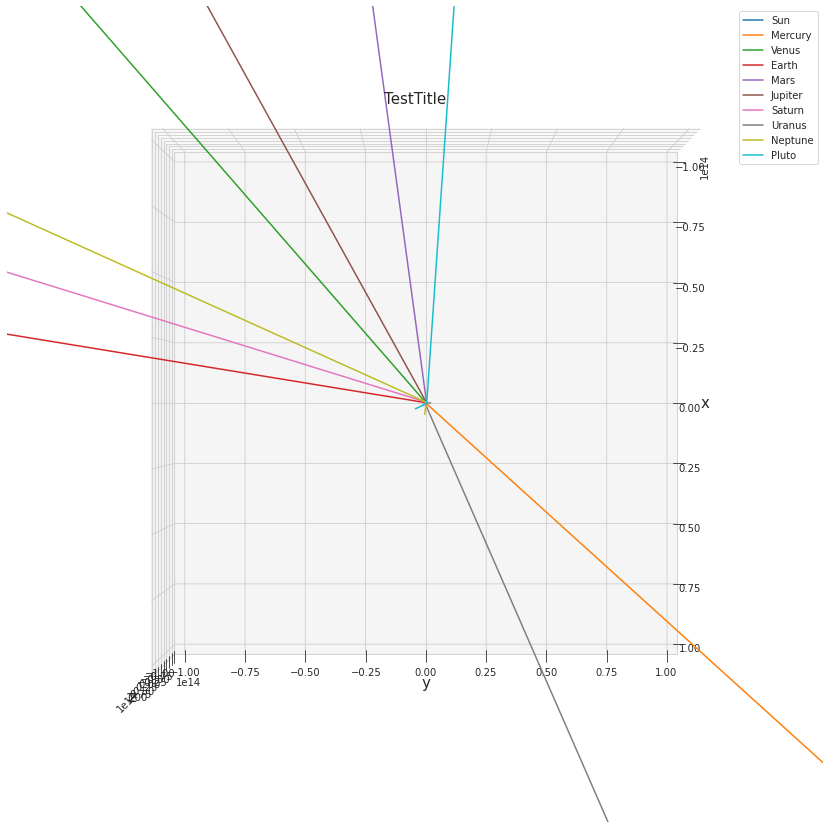

In [122]:
solar_system.generate_SimulationOrbitGraph('AnimationTesting/', 'OrbitPlot', 'TestTitle')

In [127]:
'''
Create a folder nameed AnimationTesting in the same directory as this program to test the program
To create the animation download ffmpeg, navigate to the folder with the animation frames then run the commented line
    at the bottom of this cell in the command line
'''
solar_system.positions
solar_system.run_sim_full_output('AnimationTesting/', 'TestImage', 'TestTitle', 50)

#ffmpeg -framerate 10 -i TestImage%04d.jpeg  TestImage_Movie.mp4

## Secondary Class?

https://plotly.com/python-api-reference/generated/plotly.express.scatter_3d.html
https://www.geeksforgeeks.org/plotly-express-scatter_3d-function-in-python/


https://ssd.jpl.nasa.gov/horizons/app.html#/

In [ ]:
class celestial_body():
    
    def __init__(name, pos, mass, velocity):
        
        self.name = name #string
        self.position = np.array(pos) #list
        self.mass = mass #integer
        self.velocity = np.array(velocity) #list of component velocities
        
    
    